# **COMPARING 3 CLUSTERING METHOD FOR CUSTOMER SEGMENTATION BASED ON RFM ANALYSIS**

By: Indah Yunita


---
Metode Clustering:
1. K-Means
2. K-Medoid
3. K-SOM



## **1. Pre-Requirement**

In [1]:
#library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import ticker

#library untuk clustering
!pip install scikit-learn-extra
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:00


# **Dataset**

**Sumber Data:** https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci


---
**Parameter:**

**Invoice:** Merupakan nomor transaksi berukuran 6 digit. Masing-masing nomor bersifat unik untuk setiap transaksi. Jika kode transaksi ini diawali dengan huruf ’C’ maka menandakan bahwa transaksi tersebut dibatalkan (Cancelled)

**StockCode:** Merupakan kode produk sebanyak 5 digit yang masing-masing kode mewakili setiap produk yang dijual

**Description:** Merupakan nama produk yang dijual

**InvoiceDate:** Merupakan tanggal dan waktu transaksi

**Price:** Merupakan harga produk per unit dalam satuan mata uang sterling

**Customer ID:** Merupakan kode pelanggan berukuran 5 digit yang unik untuk masing-masing pelanggan

Country: Merupakan nama kota tempat pelanggan


In [2]:
url = "https://raw.githubusercontent.com/inyunita/Dataset-KP/main/online_retail_II.csv"
df_retail = pd.read_csv(url, on_bad_lines='skip')
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df_retail.shape

(1067371, 8)

## **2. Cleaning Data**

 **Handling Missing Value**

In [5]:
#jumlah data yang kosong
df_retail.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Terdapat data yang kosong pada atribut description dan customer ID, Karena tidak memungkinkan untuk mengisi nilai kosong tersebut, akhirnya nilai-nilai yang kosong tersebut dihapus

In [6]:
#hapus data kosong
df_retail = df_retail.dropna()
df_retail.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [7]:
df_retail.shape

(824364, 8)

**Merubah Customer ID ke dalam bentuk string**

In [8]:
#merubah tipe data customer ID ke string
df_retail['Customer ID'] = df_retail['Customer ID'].astype(str)

In [9]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  object 
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 56.6+ MB


**Menghapus nilai-nilai yang tidak relevan**

---

1. Menghapus transaksi yang dibatalkan (ditandai dengan huruf C pada kode invoice)
2. Menghapus quantity dan prizce yang bernilai 0 dan dibawah 0


In [10]:
#cek apakah ada quantity yang bernilai 0
df_retail[df_retail["Quantity"]<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
#cek apakah ada price yang bernilai 0
df_retail[df_retail["Price"]<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


In [12]:
#menghilangkan transaksi yang dibatalkan
df_retail = df_retail[~df_retail["Invoice"].str.contains("C", na = False)]
#menghapus quantity dan price yang bernilai 0 dan dibawah 0
df_retail = df_retail[(df_retail["Quantity"]>0)]
df_retail = df_retail[(df_retail["Price"]>0)]

**Menghapus Data Duplikat**

In [13]:
#Cek data duplikat
df_retail[df_retail.duplicated()].shape

(26124, 8)

In [14]:
df_retail[df_retail.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
#hapus data duplikat
df_retail = df_retail.drop_duplicates(keep='first')
df_retail.shape

(779425, 8)

# **3. Exploratory Data Analysis**

Total Transaksi pada toko

In [16]:
#Total transaksi pada dataset
df_retail['Invoice'].nunique()

36969

Jumlah Customer toko online

In [17]:
#Jumlah customer 
df_retail['Customer ID'].nunique()

5878

Jumlah Total barang yang telah terjual

In [18]:
#Jumlah total barang yang terjual 
df_retail['Quantity'].sum()

10513952

**Menambah Kolom Revenue**

In [19]:
#menambahkan revenue
df_retail['Revenue'] = df_retail['Quantity'] * df_retail['Price']
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**10 Customer dengan Jumlah Barang Pembelian Terbanyak**

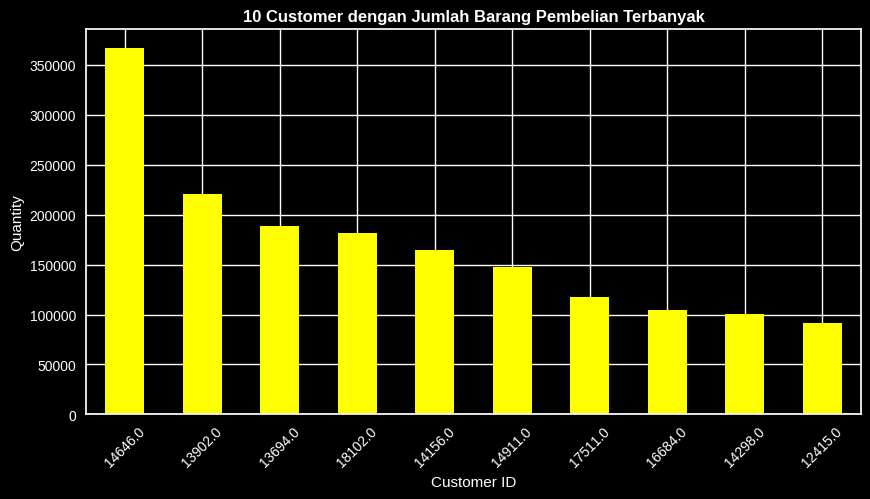

In [20]:
# 10 Customer Dengan jumlah barang dibeli paling banyak
plt.style.use('dark_background')
df_retail.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('10 Customer dengan Jumlah Barang Pembelian Terbanyak', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

**10 Customer Dengan Revenue Tertinggi**

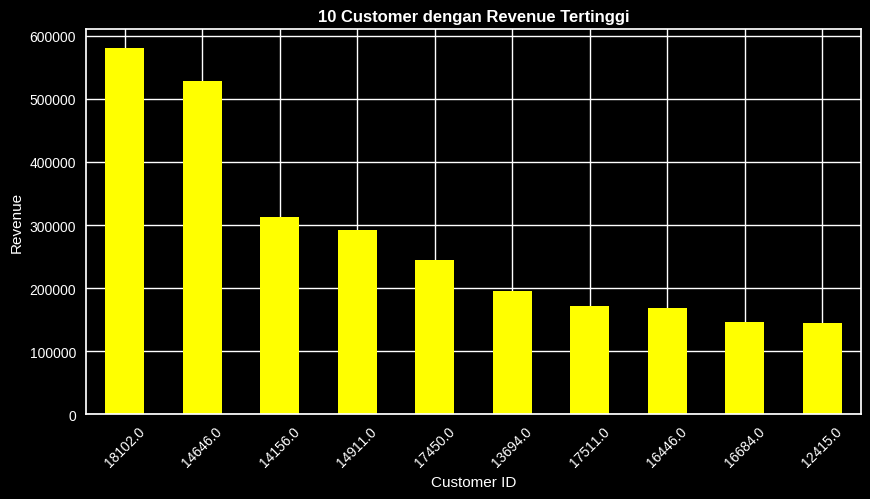

In [21]:
# 10 Customer dengan Revenue tertinggi
df_retail.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('10 Customer dengan Revenue Tertinggi', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

**10 Item dengan Penjualan Terbanyak**

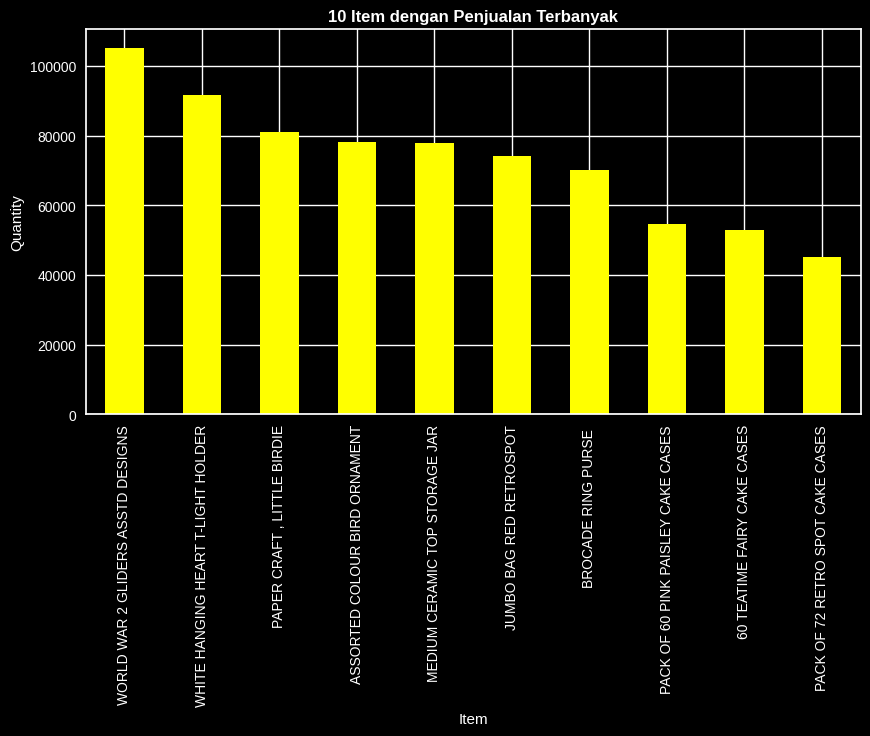

In [22]:
# 10 Item dengan Penjualan Terbanyak
df_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('10 Item dengan Penjualan Terbanyak', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

**10 Item dengan Penjualan Paling Sedikit**

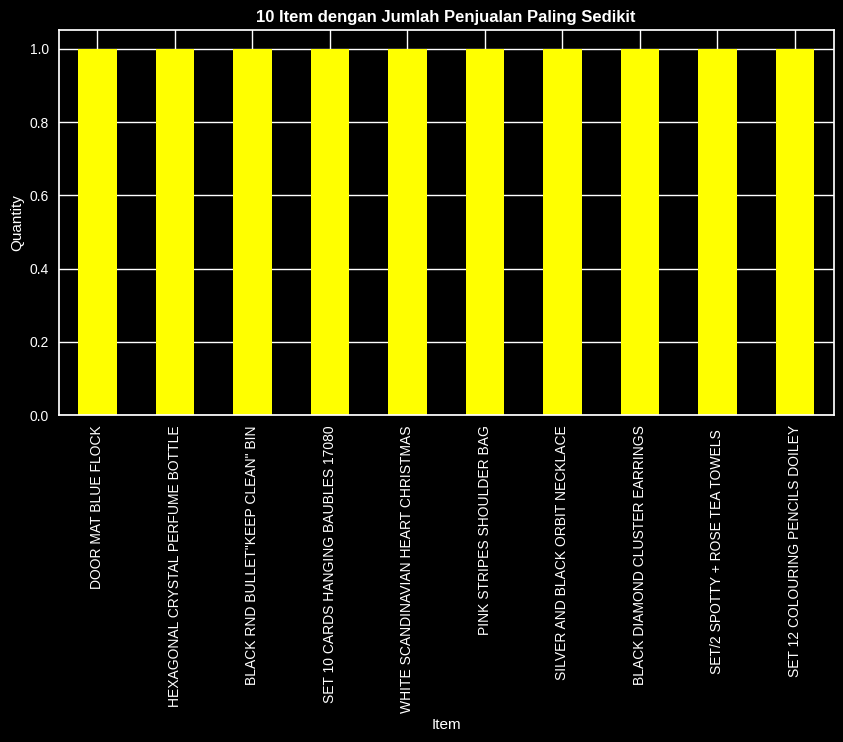

In [23]:
# 10 Item dengan Penjualan Paling Sedikit
df_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).tail(10).plot(kind='bar', color='yellow', figsize=(10,5))
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('10 Item dengan Jumlah Penjualan Paling Sedikit', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

**Revenue yang didapat Toko setiap bulan dalam 2 tahun**

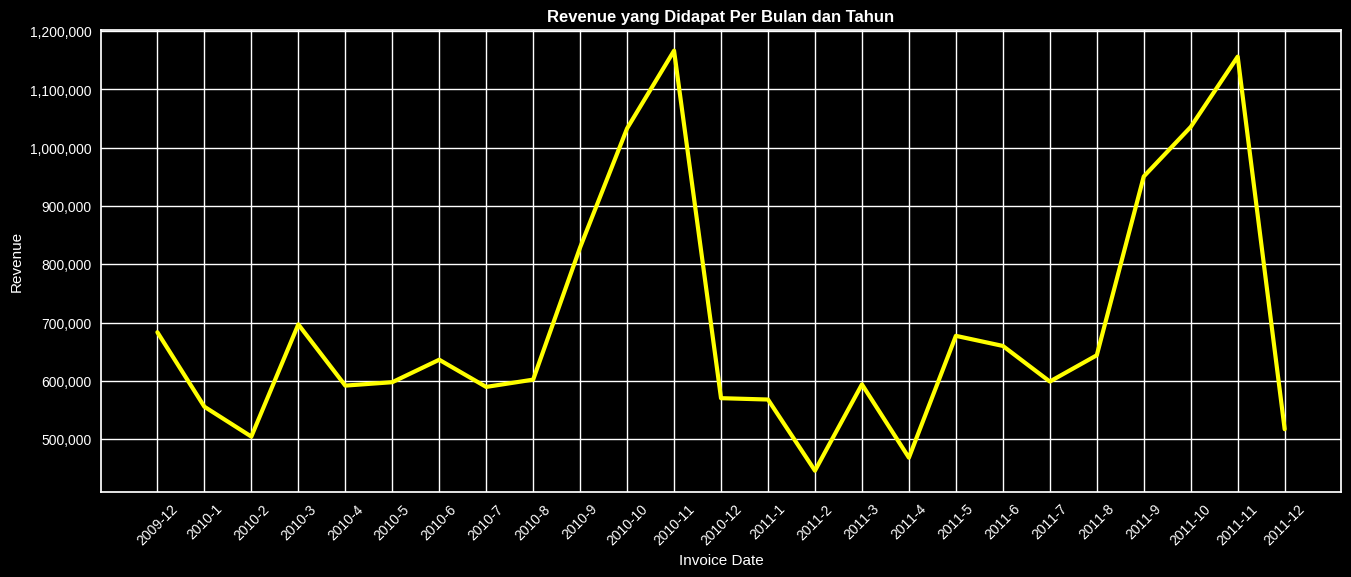

In [24]:
# Revenue per bulan dan tahun
df_retail['InvoiceDate']= pd.to_datetime(df_retail['InvoiceDate'])
monthly_revenue = df_retail.groupby([df_retail['InvoiceDate'].dt.year, df_retail['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(16,6), color='yellow', linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue yang Didapat Per Bulan dan Tahun', fontweight='bold')

# Show the plot
plt.show()

# **4. RFM Value**


---
Analisis customer didasarkan pada 3 faktor:

**R (Recency)**: Jumlah hari sejak terakhir transaksi (Seberapa baru pelanggan melakukan transaksi)

**F (Frequency)**: Jumlah Transaksi

**M (Monetary)**: Total jumlah nominal transaks



**Menentukan Atribut Monetary**

In [25]:
#Atribut Baru : Monetary
df_retail['Monetary/Amount'] = df_retail['Quantity']*df_retail['Price']
rfm_monetary = df_retail.groupby('Customer ID')['Monetary/Amount'].sum()

In [26]:
rfm_monetary = rfm_monetary.reset_index()
rfm_monetary.head()

,Customer ID,Monetary/Amount
0,12346.0,77556.46
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


**Menentukan Atribut Frequency**

In [27]:
#Atribut baru: Frequency
rfm_frequency = df_retail.groupby('Customer ID')['Invoice'].nunique()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ['Customer ID', 'Frequency']
rfm_frequency.head()

,Customer ID,Frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1


**Menentukan Atribut Recency**

In [28]:
#transaksi terakhir di retail
max_date = max(df_retail["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [29]:
#Selisih max date dan transaction date
df_retail['Diff'] = max_date - df_retail['InvoiceDate']
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Monetary/Amount,Diff
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,100.8,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,30.0,738 days 05:05:00


Recency: selisih dari masing-masing transaksi di groupby dengan customer ID,kemudian dicari nilai minimal/yang paling dekat dengan transaksi terakhir

In [30]:
#mencari recency 
rfm_recency = df_retail.groupby('Customer ID')['Diff'].min()
rfm_recency = rfm_recency.reset_index()
rfm_recency.head()

,Customer ID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [31]:
#tampilkan jumlah harinya saja
rfm_recency['Diff'] = rfm_recency['Diff'].dt.days
rfm_recency.head()

,Customer ID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [32]:
#merge column
rfm = pd.merge(rfm_recency, rfm_frequency, on= "Customer ID", how='inner')
rfm.head()

,Customer ID,Diff,Frequency
0,12346.0,325,12
1,12347.0,1,8
2,12348.0,74,5
3,12349.0,18,4
4,12350.0,309,1


In [33]:
#merge column
rfm = pd.merge(rfm, rfm_monetary, on= "Customer ID", how='inner')
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40


In [34]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40
...,...,...,...,...
5873,18283.0,3,22,2664.90
5874,18284.0,431,1,461.68
5875,18285.0,660,1,427.00
5876,18286.0,476,2,1296.43


### **Handling Outlier**

Text(0.5, 0, 'Attributes')

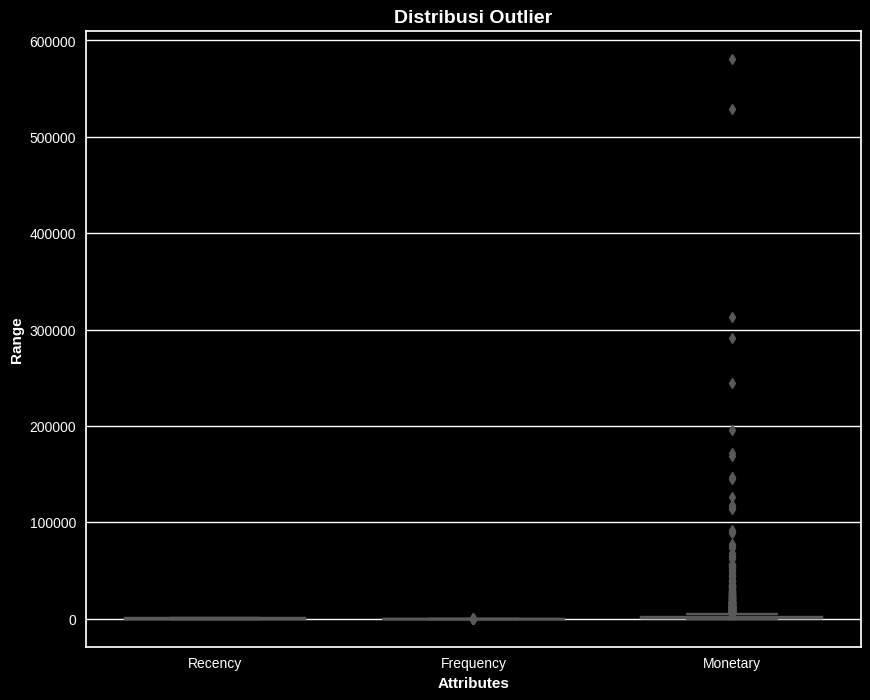

In [35]:
#Analisis outliers dari Amount, Frequency, dan Recency
atribut = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atribut], orient="v", palette = "Set2", whis=1.5, saturation=1, width=0.7)

plt.title ("Distribusi Outlier", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
# plt.savefig("Outlier Sebelum dihilangkan")

In [36]:
 #menghilangkan outlier pada atribut Monetary
 Q1 = rfm.Monetary.quantile(0.05)
 Q3 = rfm.Monetary.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR )]

 #menghilangkan outlier pada atribut recency
 Q1 = rfm.Recency.quantile(0.05)
 Q3 = rfm.Recency.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR )]

#menghilangkan outlier pada atribut Frequency
 Q1 = rfm.Frequency.quantile(0.05)
 Q3 = rfm.Frequency.quantile(0.95)
 IQR = Q3 - Q1
 rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR )]


In [37]:
rfm

,Customer ID,Recency,Frequency,Monetary
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,309,1,334.40
5,12351.0,374,1,300.93
...,...,...,...,...
5873,18283.0,3,22,2664.90
5874,18284.0,431,1,461.68
5875,18285.0,660,1,427.00
5876,18286.0,476,2,1296.43


In [38]:
rfm = rfm.reset_index()
rfm=rfm.drop(['index'],axis=1)
rfm

,Customer ID,Recency,Frequency,Monetary
0,12347.0,1,8,4921.53
1,12348.0,74,5,2019.40
2,12349.0,18,4,4428.69
3,12350.0,309,1,334.40
4,12351.0,374,1,300.93
...,...,...,...,...
5768,18283.0,3,22,2664.90
5769,18284.0,431,1,461.68
5770,18285.0,660,1,427.00
5771,18286.0,476,2,1296.43


Text(0.5, 0, 'Attributes')

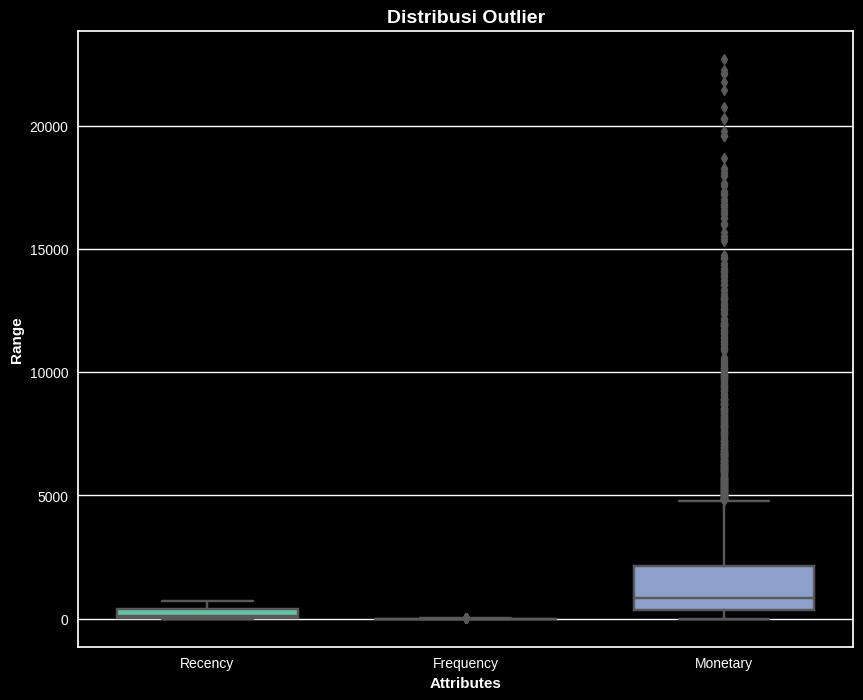

In [39]:
#Analisis outliers dari Amount, Frequency, dan Recency
atribut = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atribut], orient="v", palette = "Set2", whis=1.5, saturation=1, width=0.7)

plt.title ("Distribusi Outlier", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
# plt.savefig("Outlier Setelah dihilangkan")

### **Normalisasi Atribut**

---

Untuk menormalisasi nilai dari masing-masing atribut, perlu dilihat terlebih dahulu bagaimana karakteristik dari data apakah berdistribusi normal ataukah tidak

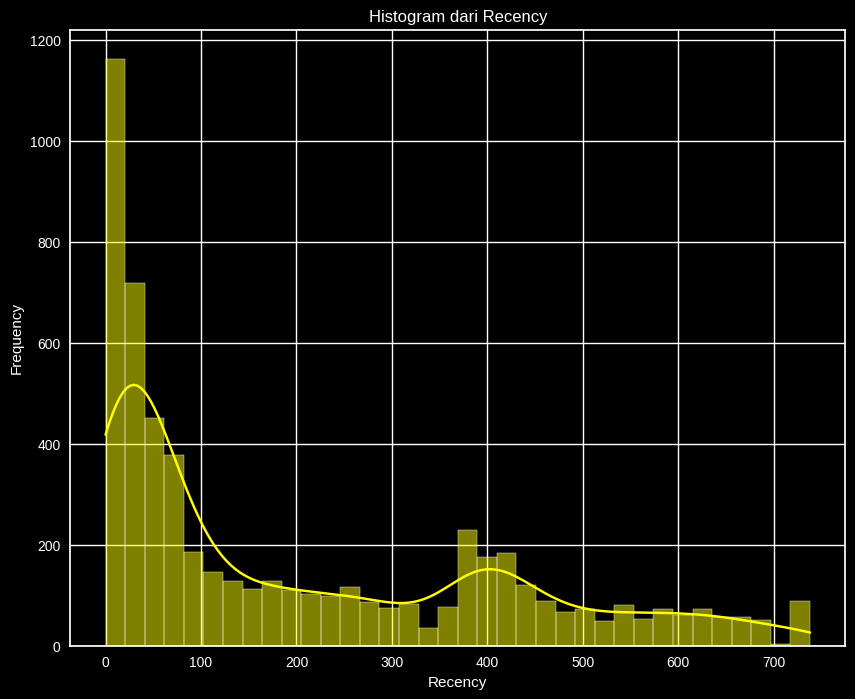

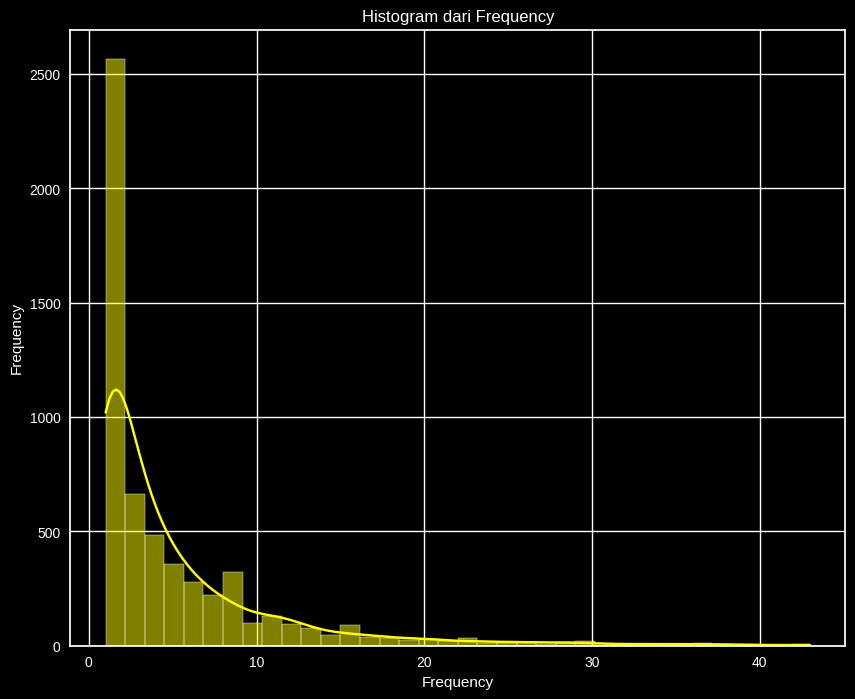

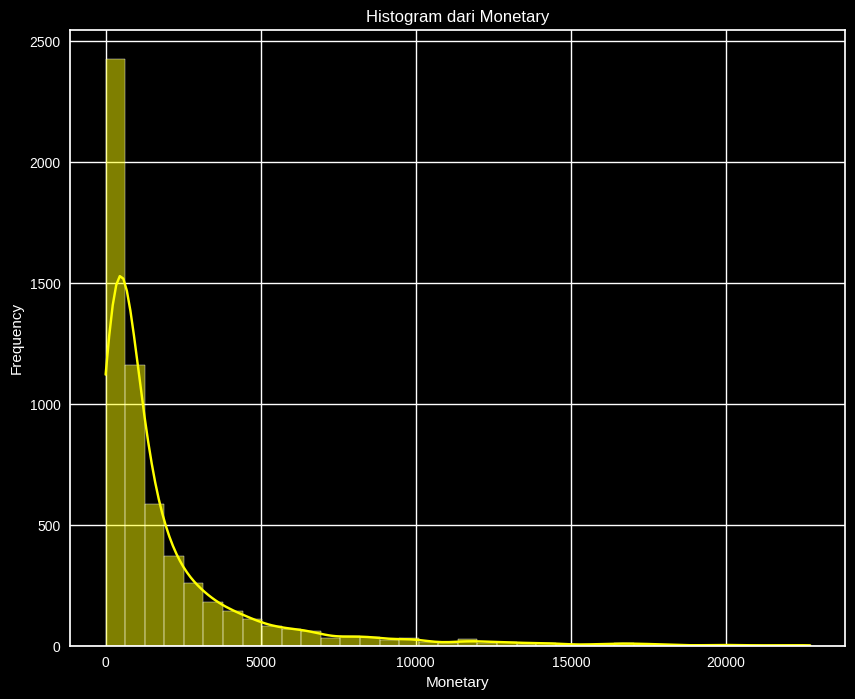

In [40]:
# Visualisasikan distribusi data untuk setiap atribut
attributes = ['Recency', 'Frequency', 'Monetary']
for attribute in attributes:
  sns.histplot(rfm[attribute], kde=True,
             bins = int(180/5), color='yellow')
  plt.xlabel(attribute)
  plt.ylabel('Frequency')
  plt.title('Histogram dari ' + attribute)
  plt.show()

Karena data tidak berdistribusi normal, maka metode normalisasi yang digunakan adalah Min-Max Scaller

In [41]:
#karena data tidak berdistribusi normal, maka untuk normalisasi data menggunakan minmax scaller
rfm_attribute = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = MinMaxScaler()
#fit transform
rfm_scaled = scaler.fit_transform(rfm_attribute)


In [42]:
rfm_scaled

array([[0.00135501, 0.16666667, 0.21660835],
       [0.100271  , 0.0952381 , 0.08880203],
       [0.02439024, 0.07142857, 0.19490427],
       ...,
       [0.89430894, 0.        , 0.01867465],
       [0.64498645, 0.02380952, 0.0569633 ],
       [0.05691057, 0.14285714, 0.18408394]])

In [43]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency','Frequency','Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,0.001355,0.166667,0.216608
1,0.100271,0.095238,0.088802
2,0.024390,0.071429,0.194904
3,0.418699,0.000000,0.014597
4,0.506775,0.000000,0.013123
...,...,...,...
5768,0.004065,0.500000,0.117229
5769,0.584011,0.000000,0.020202
5770,0.894309,0.000000,0.018675
5771,0.644986,0.023810,0.056963


## **5. Perbandingan Metode Clustering Menggunakan Silhouettee Score**

### **K-Means**

In [44]:
 from sklearn.metrics import davies_bouldin_score

### Silhouette Score

In [45]:
K_value = []
sil_score_kmeans=[]
DBI_score_kmeans=[]

for kluster in range (2,11):
  kmeans = KMeans(n_clusters=kluster, n_init = 10)
  K_value.append(kluster)
  kmeans.fit(rfm_scaled)
  from sklearn.metrics import silhouette_score
  score = silhouette_score(rfm_scaled, kmeans.labels_)
  sil_score_kmeans.append(score)

  score = davies_bouldin_score(rfm_scaled, kmeans.labels_)
  DBI_score_kmeans.append(score)


In [46]:
tbl_sil_kmeans = pd.DataFrame({'Nilai K': K_value, 'Silhouette Score' : sil_score_kmeans})
tbl_sil_kmeans

,Nilai K,Silhouette Score
0,2,0.568010
1,3,0.569562
2,4,0.525362
3,5,0.466623
4,6,0.477560
5,7,0.456492
6,8,0.454995
7,9,0.428410
8,10,0.414884


### DBI Score

In [47]:
tbl_DBI_kmeans = pd.DataFrame({'Nilai K': K_value, 'DBI Score' : DBI_score_kmeans})
tbl_DBI_kmeans

,Nilai K,DBI Score
0,2,0.624686
1,3,0.674383
2,4,0.673183
3,5,0.766140
4,6,0.724915
5,7,0.815680
6,8,0.795582
7,9,0.842198
8,10,0.844297


### **K-Medoids**

In [48]:
from sklearn_extra.cluster import KMedoids

### Silhouette Score

In [49]:
K_value = []
sil_score_kmedoids=[]
DBI_score_kmedoids=[]

for kluster in range (2,11):
  kmedoid = KMedoids(n_clusters=kluster)
  K_value.append(kluster)
  kmedoid.fit(rfm_scaled)

  #silhouette Score
  from sklearn.metrics import silhouette_score
  score_sil = silhouette_score(rfm_scaled, kmedoid.labels_)
  sil_score_kmedoids.append(score_sil)
  #DBI Score
  score_DBI = davies_bouldin_score(rfm_scaled, kmedoid.labels_)
  DBI_score_kmedoids.append(score_DBI)
   

In [50]:
tbl_sil_kmedoids = pd.DataFrame({'Nilai K': K_value, 'Silhouette Score' : sil_score_kmedoids})
tbl_sil_kmedoids

,Nilai K,Silhouette Score
0,2,0.566044
1,3,0.364728
2,4,0.441970
3,5,0.441930
4,6,0.461760
5,7,0.337907
6,8,0.372507
7,9,0.359850
8,10,0.354724


### DBI Score

In [51]:
tbl_DBI_kmedoids = pd.DataFrame({'Nilai K': K_value, 'DBI Score' : DBI_score_kmedoids})
tbl_DBI_kmedoids

,Nilai K,DBI Score
0,2,0.633898
1,3,0.881233
2,4,0.745728
3,5,0.767184
4,6,0.729878
5,7,0.955905
6,8,0.872497
7,9,0.922131
8,10,0.945788


### **K-SOM**

### Silhouette Score

In [52]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=c37d12a00856e0714fc87dbaaa448ae2ff271efb4cce843a5e91993aceef8265
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [53]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

data = np.array(rfm_scaled)
# Define range of cluster numbers
cluster_numbers = range(2, 11)

# Initialize lists to store silhouette scores
sil_score_ksom = []
DBI_score_ksom = []
qe_score_ksom = []

# Iterate over different cluster numbers
for n_cluster in cluster_numbers:
    # Determine the number of rows and columns for the grid
    n_rows = 1
    n_columns = n_cluster

    # Initialize and train K-SOM
    som = MiniSom(n_rows, n_columns, data.shape[1], sigma=0.1, learning_rate=0.5, random_seed=42)
    som.random_weights_init(data)
    som.train_random(data, 100)

    # Get cluster labels for data
   # Get the winning neuron for each data point
    winners = np.array([som.winner(x) for x in data])

    # Map the winning neuron to cluster labels
    labels = np.ravel_multi_index(winners.T, (n_rows, n_columns))

    # Calculate silhouette score
    
    silhouette_avg = silhouette_score(data, labels)
    sil_score_ksom.append(silhouette_avg)

    # Calculate DBI score
    score = davies_bouldin_score(data, labels)
    DBI_score_ksom.append(score)

In [54]:
tbl_sil_ksom = pd.DataFrame({'Nilai K': cluster_numbers, 'Silhouette Score' : sil_score_ksom})
tbl_sil_ksom

,Nilai K,Silhouette Score
0,2,0.559187
1,3,0.458755
2,4,0.523642
3,5,0.409535
4,6,0.454855
5,7,0.413737
6,8,0.387979
7,9,0.341976
8,10,0.386522


In [55]:
tbl_DBI_ksom = pd.DataFrame({'Nilai K': cluster_numbers, 'DBI Score' : DBI_score_ksom})
tbl_DBI_ksom

,Nilai K,DBI Score
0,2,0.648362
1,3,0.714477
2,4,0.669385
3,5,0.823218
4,6,0.718454
5,7,0.873693
6,8,0.780130
7,9,1.005234
8,10,0.923215


**Perbandingan Silhouette Score**


---

Nilai silhouette score berada pada rentang -1 hingga 1.

Nilai Silhouette Score yang lebih tinggi menunjukkan bahwa titik data cocok dengan baik dalam klasternya dan jauh dari klaster lainnya. Nilai 0 menunjukkan adanya tumpang tindih atau ketidakjelasan dalam pengelompokan, sedangkan nilai negatif menunjukkan bahwa titik data mungkin lebih cocok dalam klaster yang berbeda.

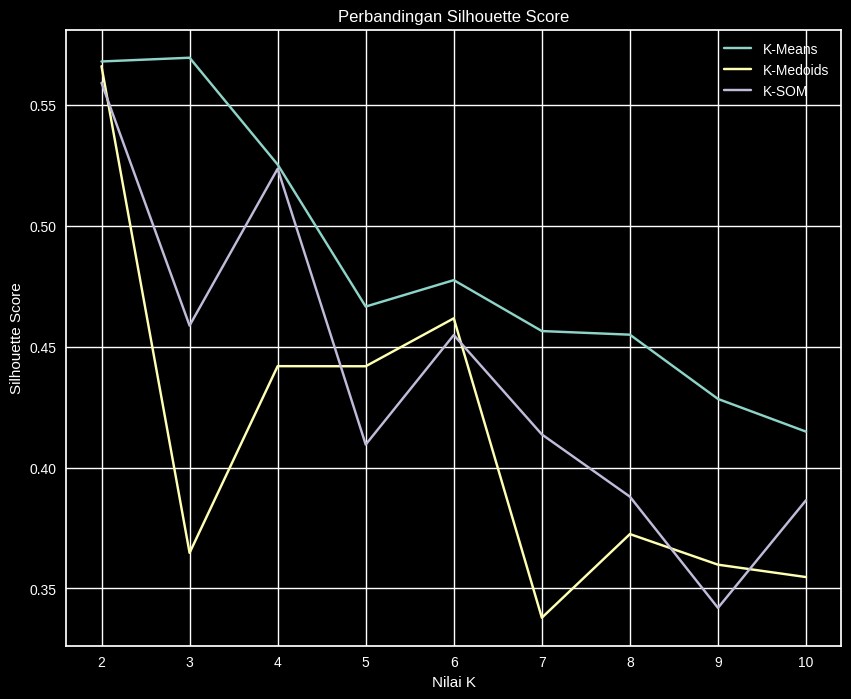

In [56]:
# Plot nilai Silhouette Score
k_values = range(2,11)
plt.plot(k_values, sil_score_kmeans, label='K-Means')
plt.plot(k_values, sil_score_kmedoids, label='K-Medoids')
plt.plot(k_values, sil_score_ksom, label='K-SOM')

# Konfigurasi plot
plt.xlabel('Nilai K')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score')
plt.legend()

# Tampilkan grafik
plt.show()

Pada evaluasi model clustering menggunakan silhouette score terlihat bahwa silhouette score terbesar adalah ketika nilai K=3 untuk K-Means dan K=2 untuk K-SOM dan K-Medoid. Kemudian dari ketiga model, nilai silhouette score yang terbesar adalah ketika menggunakan metode K-Means. Sehingga dapat ditarik kesimpulan bahwa berdasarkan evaluasi model menggunakan silhouette score, model clustering terbaik yang dapat digunakan adalah K-Means dengan nilai K=3

**Perbandingan DBI Score**

---

DBI (Davies Bouldien Index Score)
DBI menghitung seberapa baik pengelompokan berfungsi dengan mempertimbangkan jarak antara medoid klaster dan jarak antara pusat klaster. Semakin rendah nilai DBI, maka pengelompokan dianggap semakin baik. Namun, DBI pada dasarnya dirancang untuk algoritma K-Means, di mana rata-rata digunakan sebagai pusat klaster.

Karena K-Medoid menggunakan medoid sebagai pusat klaster, penggunaan DBI untuk evaluasi mungkin tidak seoptimal untuk algoritma K-Means. DBI dapat digunakan untuk membandingkan kehomogenan dalam pemisahan klaster yang dihasilkan.

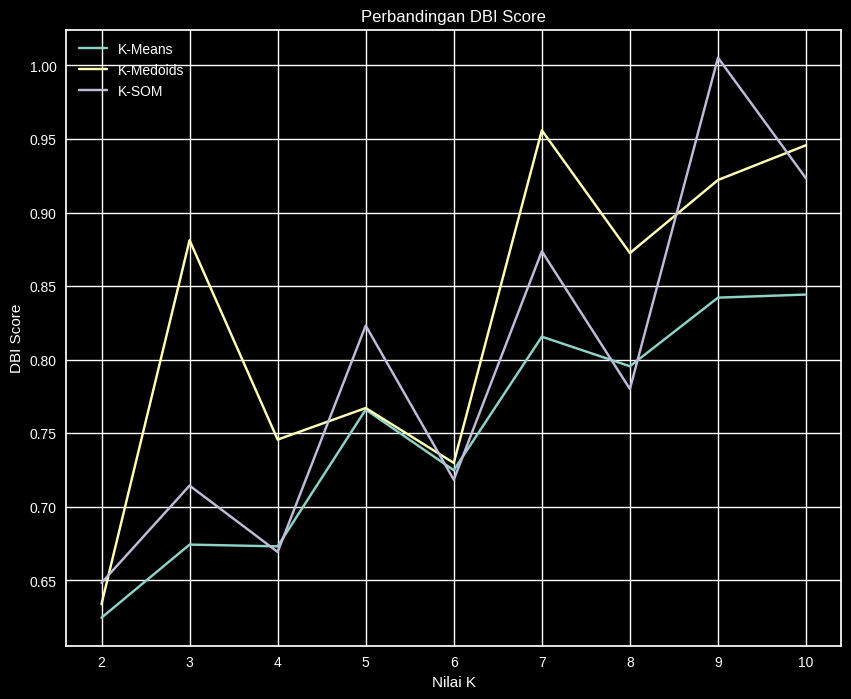

In [57]:
# Plot nilai DBI Score
k_values = range(2,11)
plt.plot(k_values, DBI_score_kmeans, label='K-Means')
plt.plot(k_values, DBI_score_kmedoids, label='K-Medoids')
plt.plot(k_values, DBI_score_ksom, label='K-SOM')

# Konfigurasi plot
plt.xlabel('Nilai K')
plt.ylabel('DBI Score')
plt.title('Perbandingan DBI Score')
plt.legend()

# Tampilkan grafik
plt.show()

Pada evaluasi menggunakan DBI Score terlihat bahwa DBI terendah untuk setiap model adalah ketika K=2. Model dengan DBI terendah adalah model yang menggunakan algoritma K-Means. Sehingga berdasarkan perbandingan tersebut ditarik kesimpulan bahwa diantara ketiga metode, metode K-Means lah yang terbaik untuk data online retail.

**Rekomendasi Bisnis**


---

Berdasarkan evaluasi menggunakan Silhouette Score dan DBI Score, didapatkan model terbaik yang paling cocok dengan dataset adalah menggunakan K-Means. Sedangkan untuk nilai K yang terbaik jika berdasarkan evaluasi menggunakan silhouette score adalah nilai K=3 sedangkan jika menggunakan DBI score adalah nilai K=2. 

Jika didasarkan pada tujuan bisnis yaitu mensegmentasi pelanggan retail online sehingga nantinya dapat dijadikan dasar untuk meningkatkan pemasaran produk kepada pelanggan berdasarkan segmentasinya, maka data akan dibagi menjadi 3 cluster (K=3) agar segmentasi yang dihasilkan lebih luas, dan perlakuan terhadap pelanggan sesuai segmentasinya bisa menjadi lebih spesifik

### **6. Penerapan Model Terbaik**


---
Model yang diterapkan untuk mensegmentasi pelanggan adalah K-Means dengan nilai K=3. Model tersebut diterapkan pada dataset yang telah dicari nilai RFM nya


In [60]:
kmeans_3 = KMeans(n_clusters=3, n_init = 10)
kmeans_3.fit(rfm_scaled)
rfm_kmeans = rfm.copy()
rfm_kmeans['Cluster'] = kmeans_3.labels_
rfm_kmeans

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12347.0,1,8,4921.53,1
1,12348.0,74,5,2019.40,1
2,12349.0,18,4,4428.69,1
3,12350.0,309,1,334.40,0
4,12351.0,374,1,300.93,0
...,...,...,...,...,...
5768,18283.0,3,22,2664.90,2
5769,18284.0,431,1,461.68,0
5770,18285.0,660,1,427.00,0
5771,18286.0,476,2,1296.43,0


### **Analisis Karakteristik Data Setiap Cluster**


---

Analisis karakteristik data pada setiap cluster dilakukan dengan membandingkan rata-rata masing-masing atribut RFM data dengan rata-rata atribut RFM pada masing-masing cluster

In [62]:
rfm.mean()

<ipython-input-62-958e41a009b9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rfm.mean()


Recency       203.188117
Frequency       5.202321
Monetary     1884.939635
dtype: float64

In [65]:
cluster_0 = rfm_kmeans[rfm_kmeans['Cluster']==0]
cluster_0.mean()

<ipython-input-65-d664126acce8>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_0.mean()


Recency      471.612428
Frequency      2.135861
Monetary     689.270154
Cluster        0.000000
dtype: float64

In [66]:
cluster_1 = rfm_kmeans[rfm_kmeans['Cluster']==1]
cluster_1.mean()

<ipython-input-66-e753556c7eb7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_1.mean()


Recency        78.056089
Frequency       4.540492
Monetary     1473.462066
Cluster         1.000000
dtype: float64

In [67]:
cluster_2 = rfm_kmeans[rfm_kmeans['Cluster']==2]
cluster_2.mean()

<ipython-input-67-45da59d3a1ec>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_2.mean()


Recency        31.803704
Frequency      20.072222
Monetary     8630.203635
Cluster         2.000000
dtype: float64

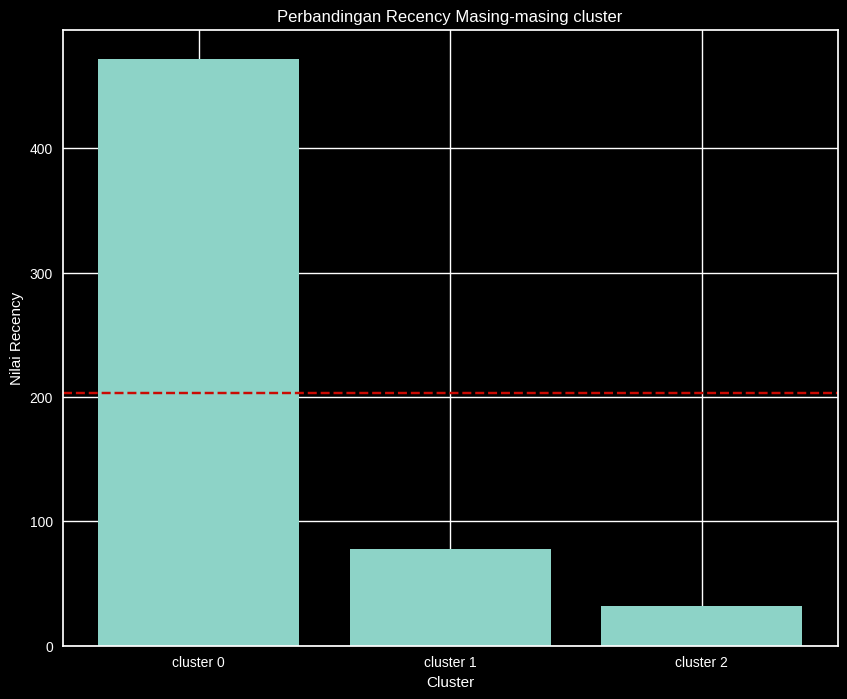

In [84]:
recency_value = [cluster_0['Recency'].mean(), cluster_1['Recency'].mean(), cluster_2['Recency'].mean()]
frequency_value = [cluster_0['Frequency'].mean(), cluster_1['Frequency'].mean(), cluster_2['Frequency'].mean()]
monetary_value = [cluster_0['Monetary'].mean(), cluster_1['Monetary'].mean(), cluster_2['Monetary'].mean()]

cluster = ['cluster 0', 'cluster 1', 'cluster 2']

rfm_recency = rfm['Recency'].mean()
rfm_frequency = rfm['Frequency'].mean()
rfm_monetary = rfm['Monetary'].mean()

# Membuat diagram batang
plt.bar(cluster, recency_value)

# Menambahkan garis untuk nilai lulus
plt.axhline(y=rfm_recency, color='r', linestyle='--')

# Memberi label pada sumbu-sumbu dan judul diagram
plt.xlabel('Cluster')
plt.ylabel('Nilai Recency')
plt.title('Perbandingan Recency Masing-masing cluster')

# Menampilkan diagram
plt.show()

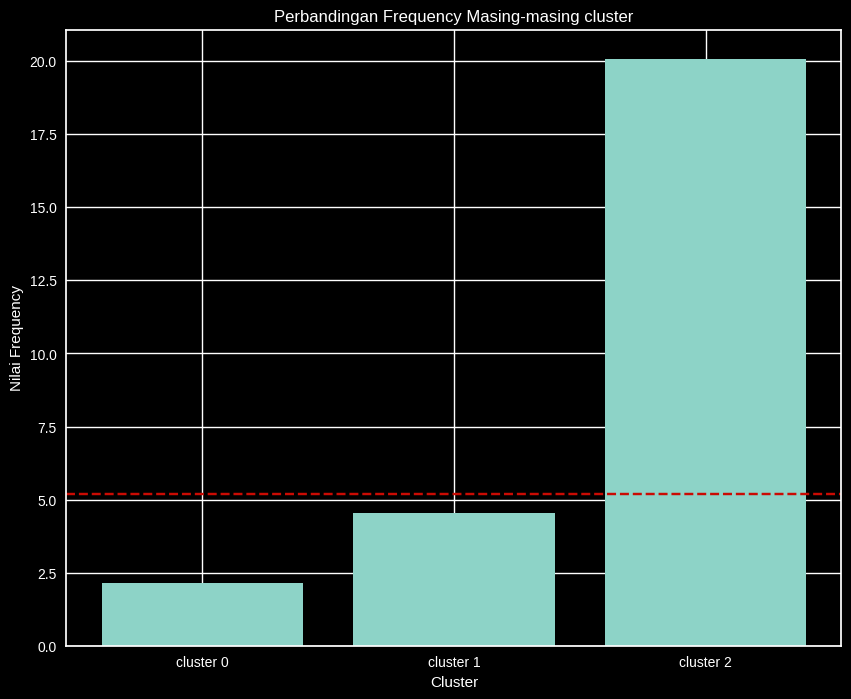

In [85]:
# Membuat diagram batang
plt.bar(cluster, frequency_value)

# Menambahkan garis untuk nilai lulus
plt.axhline(y=rfm_frequency, color='r', linestyle='--')

# Memberi label pada sumbu-sumbu dan judul diagram
plt.xlabel('Cluster')
plt.ylabel('Nilai Frequency')
plt.title('Perbandingan Frequency Masing-masing cluster')

# Menampilkan diagram
plt.show()

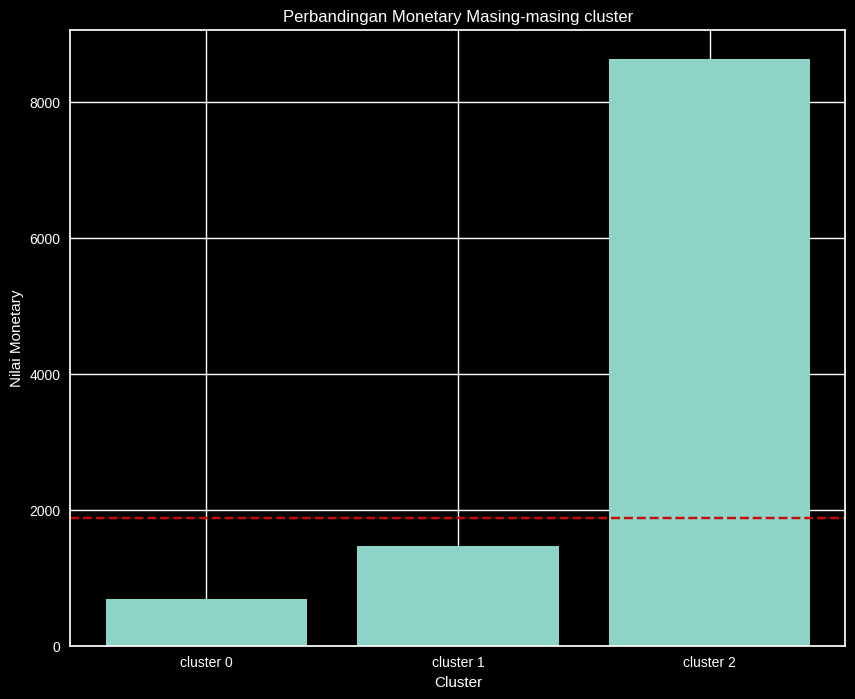

In [86]:
# Membuat diagram batang
plt.bar(cluster, monetary_value)

# Menambahkan garis untuk nilai lulus
plt.axhline(y=rfm_monetary, color='r', linestyle='--')

# Memberi label pada sumbu-sumbu dan judul diagram
plt.xlabel('Cluster')
plt.ylabel('Nilai Monetary')
plt.title('Perbandingan Monetary Masing-masing cluster')

# Menampilkan diagram
plt.show()

Cluster 0: Customer Hibernasi
- Recency Tinggi
- Frequency rendah
- Monetary Rendah
Karakteristik: Jarak transaksi terakhir customer dengan data tanggal transaksi terakhir toko sangat jauh, artinya customer sudah lama tidak datang belanja ke toko, Frekuensi juga rendah artinya pelanggan jarang sekali datang ke toko, monetary juga rendah artinya total transaksi pelanggan di toko sangat-sangat jarang


Cluster 1: Customer Baru
- Recency Rendah
- Frequency Rendah
- Monetary rendah
Karakteristik: jarak transaksi terakhir sangat dekat, namun frekuensi pembelian masih rendah dan total transaksi juga masih sedikit. Customer ini merupakan customer baru

Cluster 2: Customer Terbaik
- Recency Rendah
- Frequency tinggi
- Monetary tinggi

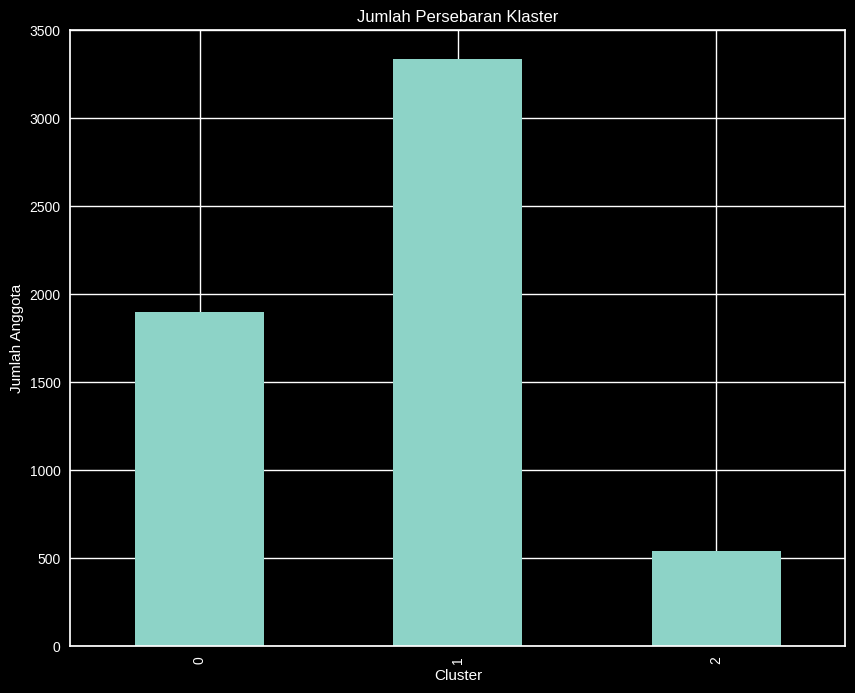

In [90]:
# pd.value_counts(rfm_kmeans['Cluster']).plot.bar()
# Mendapatkan nilai perhitungan anggota kluster
cluster_counts = rfm_kmeans['Cluster'].value_counts().sort_index()

# Membuat diagram batang berdasarkan label kluster yang terurut
cluster_counts.plot.bar()
plt.title('Jumlah Persebaran Klaster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Anggota')
plt.savefig('Jumlah Persebaran Klaster')
rfm_kmeans['Cluster'].value_counts()
plt.show()
     

Berdasarkan diagram persebaran cluster, urutan jumlah pelanggan dari terbesar ke terkecil adalah sebagai berikut:
1. Cluster 1 : Customer Baru

Strategi Marketing: beri diskon khusus pelanggan baru, tawarkan membership, tingkatkan kualitas pelayanan dan kenyamanan agar pelanggan baru semakin senang berbelanja

2. Cluster 0 : Customer Hibernasi

Strategi Marketing: buat komunikasi personal dengan mereka, tawarkan produk-produk secara intens melalui email, cari tau/survei tingkat kepuasan mereka dan apa yang membuat mereka jarang berbelanja kembali

3. Cluster 2 : Customer terbaik

Strategi Marketing: Buat reward untuk pelanggan terbaik seperti diskon, atau hadiah loyalitas, kenali pelanggan cluster 2 secara individual dan buat rekomendasi produk yang relevan dengan mereka



